In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:,1:2].values

In [3]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

Feature Scaling

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0 ,1))

In [6]:
training_set_scaled = sc.fit_transform(training_set)

In [7]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [8]:
#creating a data structure with 60 timesteps(based on trends of last 60 days) and 1 output

X_train = []
y_train = []

for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

In [9]:
X_train,y_train = np.array(X_train), np.array(y_train)

In [10]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [11]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [12]:
#reshaping - to add a dimension in np.array

X_train  = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [13]:
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

Buidling the RNN

In [14]:
#Importing libraries

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [15]:
#initialising the RNN
regressor = Sequential()

In [16]:
#Adding the first LSTM layer, #
#and some DRopout regularization to avoid overfitting

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
#only two last columns in input_shape, because first one, of observations, is already taken into account

regressor.add(Dropout(rate = 0.2)) #Rate of neurons we wanted to ignore, standard is 20%

In [17]:
#Adding the second LSTM and Dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

In [18]:
#Adding the third LSTM and Dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

In [19]:
#Adding the fourth LSTM and Dropout regularization
regressor.add(LSTM(units = 50))
#return_sequences, default is False, so not written, as its last layer
regressor.add(Dropout(rate = 0.2))

In [20]:
#Adding the output layer
regressor.add(Dense(units = 1))

Compiling the RNN

In [21]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [22]:
#Fitting the RNN to the training set

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0505
Epoch 2/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0068
Epoch 3/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0059
Epoch 4/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0055
Epoch 5/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0057
Epoch 6/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0052
Epoch 7/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0051
Epoch 8/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0049
Epoch 9/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0049
Epoch 10/100
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0047
Epoch 11/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0047
Epoch 12/100
1198/1198 [==============================] - 6s 5ms/step - lo

In [23]:
#Making prediction & visualize the result

dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2].values

In [26]:
#Getting predicted price of Google Stock

dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)

#For each financial day, we need 60 back days data
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [29]:
#Getting thr predicted stock price of 2017
X_test = []

for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


In [30]:
predicted_stock_price

array([[773.87103],
       [771.406  ],
       [771.42346],
       [772.45654],
       [775.40765],
       [780.8589 ],
       [786.194  ],
       [788.9252 ],
       [789.8976 ],
       [789.9815 ],
       [789.6914 ],
       [789.1704 ],
       [788.6659 ],
       [788.8391 ],
       [789.5121 ],
       [793.5683 ],
       [799.907  ],
       [807.06824],
       [811.488  ],
       [808.59314]], dtype=float32)

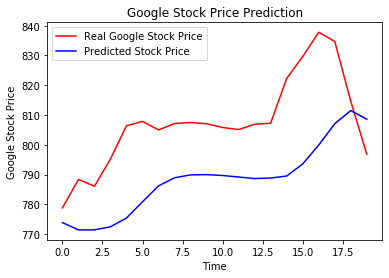

In [31]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [36]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
rmse

22.284959882572007